data source from kaggle downloaded into local machine in csv format

"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

<h1>Extract, Transform, Load (ETL)</h1>

In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
#import the data
data = pd.read_csv('database/data.csv', encoding='unicode_escape')

In [3]:
#read the first 5 rows dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
#dataset size and transactions period
print('dataset size')
print('============')
print('total rows {} and columns {}'.format(data.shape[0], data.shape[1]))

dataset size
total rows 541909 and columns 8


In [5]:
#verify data types each features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
#InvoiceDate column in object type we need to convert them to date
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [7]:
#check percentage missing values of total dataset
for col in data.columns:
    missing = data[col].isna().sum()
    if missing > 0:
        print(col,'-->',round(missing/len(data)*100,2),'%')
print('remove missing values for this analysis to simplify the process. in reality this need to be investigated the reasons \
for the missing CustomerID')

Description --> 0.27 %
CustomerID --> 24.93 %
remove missing values for this analysis to simplify the process. in reality this need to be investigated the reasons for the missing CustomerID


In [8]:
data_new = data.dropna(axis=0)

In [9]:
#change description to lower case
data_new.Description = data_new['Description'].str.lower()

C:\Users\wkbmi\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [10]:
#change customerID data type float to int
data_new['CustomerID'] = data_new['CustomerID'].astype('int')

<ipython-input-10-1434c5d1ede0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['CustomerID'] = data_new['CustomerID'].astype('int')


In [11]:
#removing duplicate rows assuming based on below matching subsets criteria
print('total duplicate rows before removing: ', data_new.duplicated(subset=['InvoiceNo','StockCode','CustomerID','Quantity']).sum())
data_new = data_new.drop_duplicates(subset=['InvoiceNo','StockCode','CustomerID','Quantity'])
print('total duplicate rows after removing: ', data_new.duplicated(subset=['InvoiceNo','StockCode','CustomerID','Quantity']).sum())

total duplicate rows before removing:  5281
total duplicate rows after removing:  0


In [12]:
#check the statistical summary
import warnings
warnings.filterwarnings('ignore')
print('dataset statistical summary')
data_new.describe(include='all')

dataset statistical summary


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,401548,401548,401548,401548.000000,401548,401548.000000,401548.000000,401548
unique,22190,3684,3896,NaN,20460,NaN,NaN,37
top,576339,85123A,white hanging heart t-light holder,NaN,2011-11-14 15:27:00,NaN,NaN,United Kingdom
freq,542,2065,2058,NaN,543,NaN,NaN,356687
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,12.185721,NaN,3.436221,15281.250259,NaN
std,NaN,NaN,NaN,250.297274,NaN,69.329175,1713.972294,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13939.000000,NaN


##### findings from statistical summary
1. StockCode and Description - imbalance of unique count
2. unitprice and quantity - showing negative values (these can indicate that refund were performed which we do not need in this analysis)

#### remove negative values found on quantity

In [13]:
data_new = data_new[(data_new['UnitPrice']>=0.0000) & (data_new['Quantity']>0)]

In [14]:
data_new.describe()

,Quantity,UnitPrice,CustomerID
count,392707.000000,392707.000000,392707.000000
mean,13.153323,3.105738,15287.814090
std,181.593481,21.518832,1713.539957
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


#### normalize stockcode and description

In [15]:
#create a stocklist for unique code and description
df_stock = data_new[['StockCode','Description']].drop_duplicates(subset='StockCode')

In [16]:
#next merge the stocklist dataframe created with dataset
data_new = data_new.merge(df_stock, how='left', on='StockCode')

In [17]:
data_new.drop(columns='Description_x', inplace=True)
data_new.rename(columns={'Description_y':'Description'}, inplace=True)

<h1>Exploratory Data Analysis (EDA)</h1>

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use('ggplot')

In [19]:
#create column for sum of transactions
data_new['total_sales'] = data_new['Quantity']*data_new['UnitPrice']

In [20]:
data_new['date'] = data_new['InvoiceDate'].dt.date
data_new['year'] = data_new['InvoiceDate'].dt.year
data_new['month'] = data_new['InvoiceDate'].dt.month

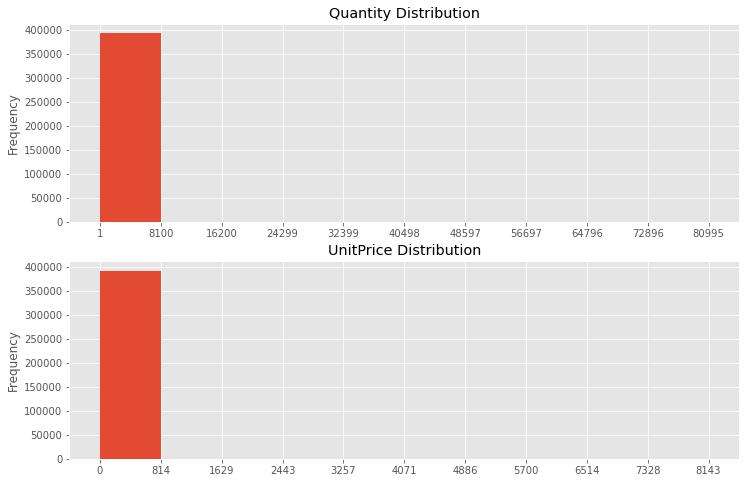

In [21]:
#distribution like for quantity and unitprice
plt.subplot(211)
count, bin_edges = np.histogram(data_new['Quantity'], bins=10)
data_new['Quantity'].plot(kind='hist', xticks=bin_edges)
plt.title('Quantity Distribution')
plt.subplot(212)
count, bin_edges = np.histogram(data_new['UnitPrice'], bins=10)
data_new['UnitPrice'].plot(kind='hist', xticks=bin_edges)
plt.title('UnitPrice Distribution')
plt.show()

In [22]:
print('transaction data from {} to {}'.format(data_new.InvoiceDate.dt.date.min(),data_new.InvoiceDate.dt.date.max()))
print('total products', data_new['StockCode'].nunique())
#countries 
print('total country sales ',data_new['Country'].nunique())
print('Transaction Count ', data_new['InvoiceNo'].nunique())
print('features dataset ', data_new.columns)

transaction data from 2010-12-01 to 2011-12-09
total products 3665
total country sales  37
Transaction Count  18536
features dataset  Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country', 'Description', 'total_sales', 'date', 'year',
       'month'],
      dtype='object')


In [23]:
country_group = data_new.groupby('Country')

<AxesSubplot:ylabel='Country'>

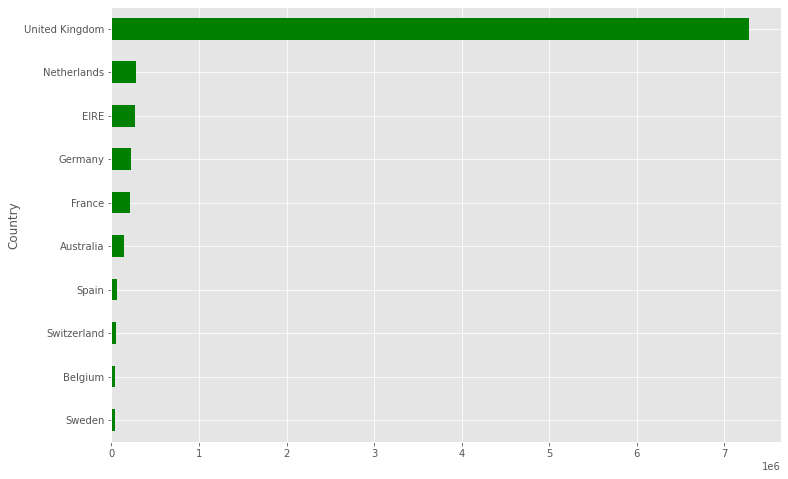

In [24]:
#top 10 countries by revenue
country_group['total_sales'].sum().nlargest(10).sort_values().plot.barh(color='g')
# plt.ylabel('Revenue')
# plt.title('Top 10 Country by Revenue')

In [25]:
yearmonth = data_new.groupby(['year','month'])

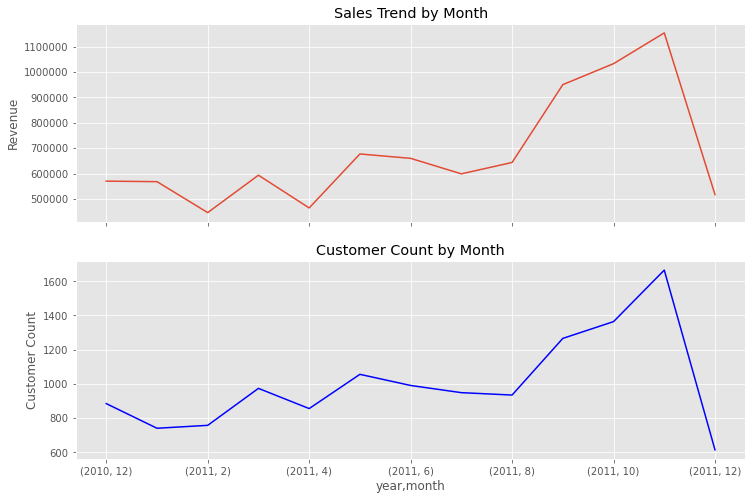

In [30]:
#sales trend over year
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
yearmonth['total_sales'].sum().plot(ax=ax1, label='Revenue')
yearmonth['CustomerID'].nunique().plot(ax=ax2, label = 'Customer Count', color='b')
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_title('Sales Trend by Month')
ax1.set_ylabel('Revenue')
ax2.set_title('Customer Count by Month')
ax2.set_ylabel('Customer Count')
plt.show()

Text(0.5, 1.0, 'Customer purchase by day of week')

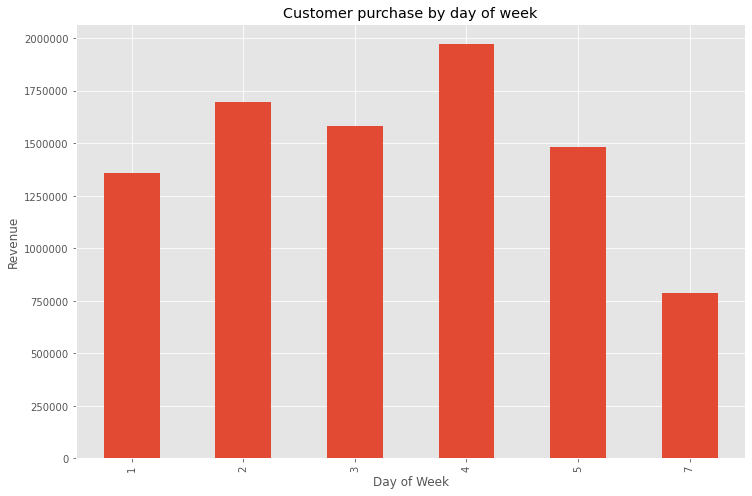

In [27]:
#Day of week customer make most purchase
data_new.groupby(data_new['InvoiceDate'].dt.dayofweek+1)['total_sales'].sum().plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Day of Week')
plt.ylabel('Revenue')
plt.title('Customer purchase by day of week')

Text(0.5, 0, 'Revenue')

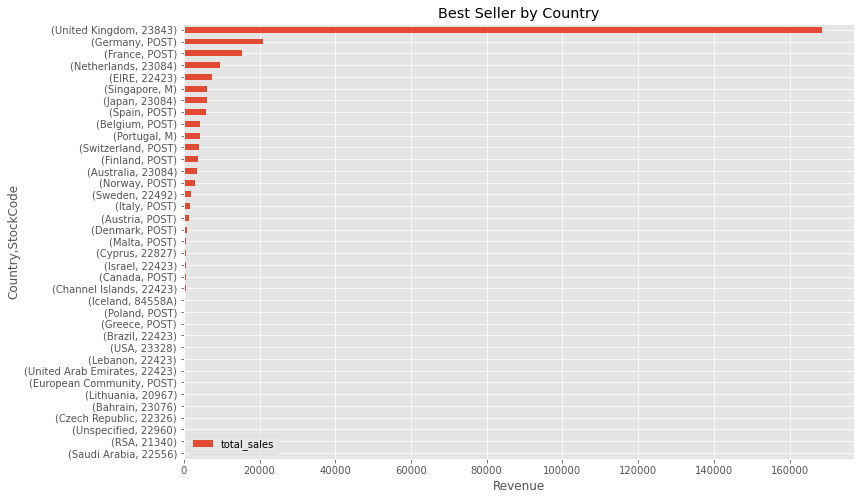

In [28]:
#Which is the best selling product in each country?
df_products = data_new.groupby(['Country','StockCode'])['total_sales'].sum().to_frame().sort_values(by='total_sales',ascending=False)
df_products.groupby(level=0).head(1).sort_values('total_sales').plot( kind='barh')
plt.title('Best Seller by Country')
plt.xlabel('Revenue')

<AxesSubplot:xlabel='CustomerID'>

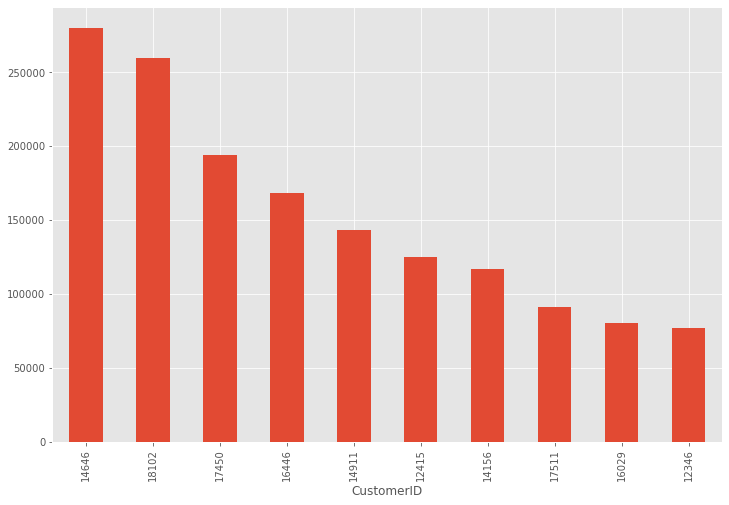

In [29]:
#top 10 customers
data_new.groupby('CustomerID')['total_sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar')